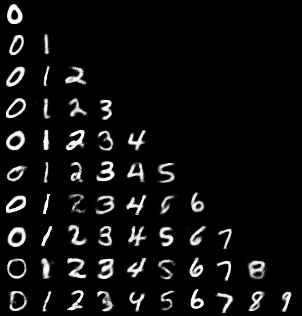

In [6]:
import os
from PIL import Image
import numpy as np

def stack_images_to_matrix(image_dir, count=10, prefix='', suffix='.png'):
    # Load images
    images = []
    max_width = 0
    heights = []

    for i in range(1, count + 1):
        filename = os.path.join(image_dir, f"{prefix}{i:02d}{suffix}")
        img = Image.open(filename).convert("RGB")  # convert to RGB
        images.append(img)
        max_width = max(max_width, img.width)
        heights.append(img.height)

    # Pad images to same width
    padded_images = []
    for img in images:
        if img.width < max_width:
            new_img = Image.new("RGB", (max_width, img.height), color=(0, 0, 0))  # black background
            new_img.paste(img, (0, 0))
            padded_images.append(new_img)
        else:
            padded_images.append(img)

    # Stack images vertically
    total_height = sum(heights)
    stacked_image = Image.new("RGB", (max_width, total_height), color=(0, 0, 0))

    y_offset = 0
    for img in padded_images:
        stacked_image.paste(img, (0, y_offset))
        y_offset += img.height

    return stacked_image

vcl_img = stack_images_to_matrix("samples/vcl")
vcl_img.show()  # or matrix_img.save("matrix.png")


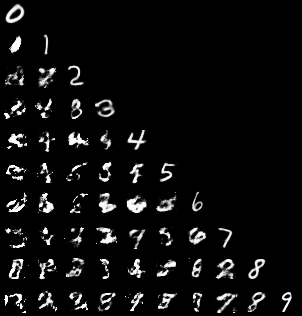

In [7]:
naive_img = stack_images_to_matrix("samples/naive")
naive_img.show()

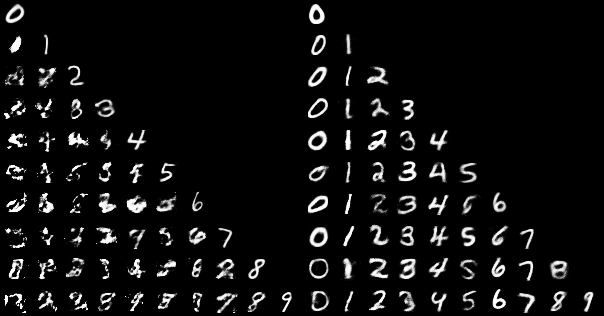

In [9]:
Image.fromarray(np.hstack([naive_img, vcl_img]))